In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("./test_algos/results/") #entropic_reg_bary debiased_sink_bary kbcm_bary tlp_bary
#os.chdir("..")

In [3]:
def p(b):
    plt.figure(figsize=(5,5))
    plt.imshow(b)
    plt.axis("off")
    plt.show()

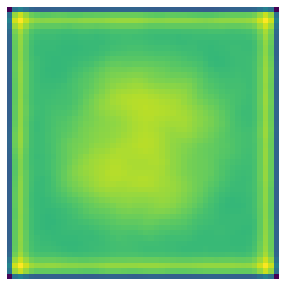

In [4]:
b1 = np.load("./entropic_reg_bary/bary_noiselvl_1.000_reg_4.npy")
p(b1)

0.0002064541909157258


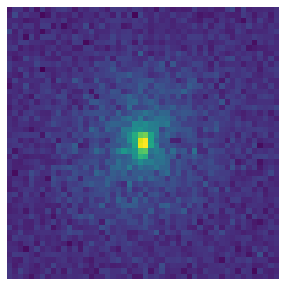

In [5]:
b2 = np.load("./entropic_reg_bary/bary_noiselvl_1.000_reg_0.1.npy")
print(b2.max()-b2.min())
p(b2)

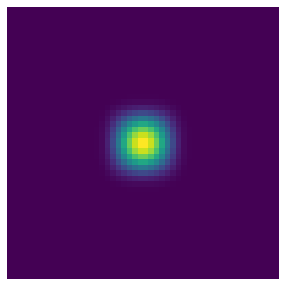

52


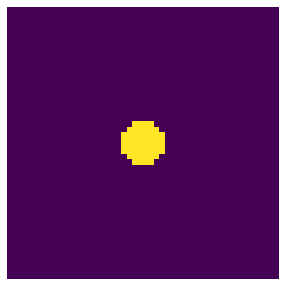

In [6]:
b3 = np.load("./entropic_reg_bary/bary_noiselvl_0.000_reg_4.npy")
p(b3)
ampl3 = b3.max() - b3.min()
c3 = b3 > ampl3/2
print(c3.sum())
p(c3)

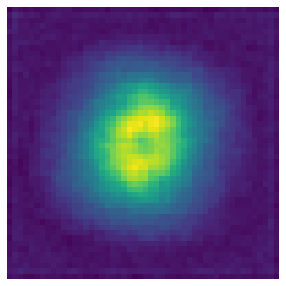

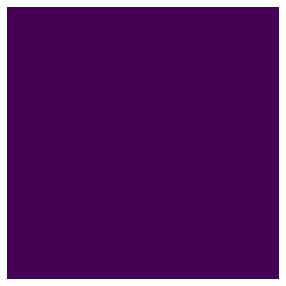

2500
0.0002752274559657407


In [7]:
b4 = np.load("./entropic_reg_bary/bary_noiselvl_0.200_reg_0.5.npy")
p(b4)
thld4 = (b4.max() - b4.min())/2
c4 = b4 >= thld4
p(c4)
print(c4.sum())
print(thld4*2)

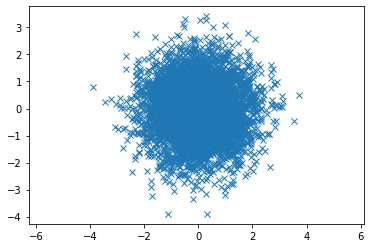

In [8]:
mean = [0, 0]

cov = [[1, 0], 
       [0, 1]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 5000).T

plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

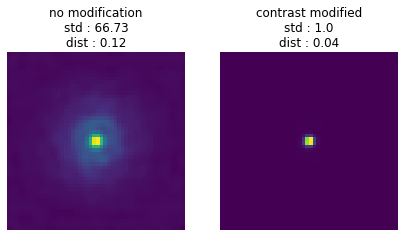

<Figure size 432x288 with 0 Axes>

In [16]:
def pixel_above_thr(image, threshold):
    """
    Get the pixels' coordinates which have amplitude 
    greater then or equal to half the maximum amplitude.
    """

    return (np.array(np.where(image >= threshold / 2)), image[np.where(image >= threshold / 2)])


def std_pixels(pixels):
    """
    Get the standard deviation of the above-threshold pixels coordinates.

    sigma = sqrt(sum_{i=0}^n( (xi – mu)2 / n ))
    """

    mu = np.array([np.mean(pixels, axis=1)]).T

    sigma = np.array([np.sqrt(np.sum(np.square(pixels - mu), axis=1) / pixels.shape[0])]).T
    return sigma

def l2(x):
    dist = np.sqrt(x[0] ** 2 + x[1] ** 2)
    return round(dist[0],3)


def l2_bis(x):
    dist = np.sqrt(x[0] ** 2 + x[1] ** 2)
    return round(dist,3)

def get_barycenter_location(loc_pixels_abv_thld, value_pixels_abv_thld):
    if len(value_pixels_abv_thld) != 0:
        value_pixels_abv_thld /= value_pixels_abv_thld.sum()
        average = np.zeros(shape=(1, 2))
        for i in range(len(value_pixels_abv_thld)):
            average += loc_pixels_abv_thld[:, i] * value_pixels_abv_thld[i]
        return average[0]
    else:
        return np.array([np.inf, np.inf])

b5 = np.load("./debiased_sink_bary/bary_noiselvl_0.500_eps_0.005_iter_100_intensity_minmax.npy")

plt.figure(figsize=(7,4))

#print("--before contrast change--")
ampl5 = b5.max() - b5.min()
thld5 = ampl5/2
pixels_loc,pixels_val = pixel_above_thr(b5,thld5)
dist = round(l2_bis(get_barycenter_location(pixels_loc,pixels_val) - np.array([24.5,24.5])),2)
std = l2(std_pixels(pixels_loc))
plt.subplot(1,2,1)
plt.title("no modification\nstd : " + str(std) + "\ndist : " + str(dist))
plt.imshow(b5)
plt.axis('off')

#print("--after contrast change--")
b5 -= b5.min()
b5 *= 1/b5.max()
b5 **= 4
ampl5 = b5.max() - b5.min()
thld5 = ampl5/2
pixels_loc,pixels_val = pixel_above_thr(b5,thld5)
dist = round(l2_bis(get_barycenter_location(pixels_loc,pixels_val) - np.array([24.5,24.5])),2)
std = l2(std_pixels(pixels_loc))
plt.subplot(1,2,2)
plt.title("contrast modified\nstd : " + str(std) + "\ndist : " + str(dist))
plt.imshow(b5)
plt.axis("off")

plt.show()
plt.savefig("/home/legmint/Documents/MLDM/S2/Internship/OT/report_internship_labHC/images/dsb_contrast_modification.png")

0.0005219939215032381


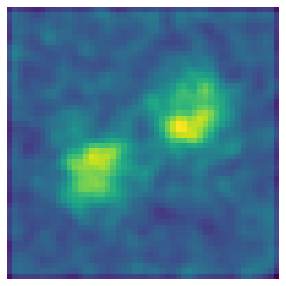

In [10]:
b6 = np.load("./tlp_bary/bary_noiselvl_1.000_reg_0.001_eta_1_outer-inner_10-100_samples_10_intensity_minmax.npy")
print(b6.max()-b6.min())
p(b6)

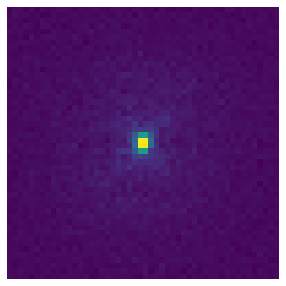

0.0009099253739491443
0.004
721.543


In [21]:
b7 = np.load("./entropic_reg_bary//bary_noiselvl_0.500_reg_0.05.npy")
p(b7)
ampl7 = b7.max() - b7.min()
thld7 = ampl7/2
pixels_loc,pixels_val = pixel_above_thr(b7,thld7)
dist = l2_bis(get_barycenter_location(pixels_loc, pixels_val) - np.array([24.5,24.5]))
std = l2(std_pixels(pixels_loc))
print(ampl7)
print(dist)
print(std)